In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#Importing important sklearn libraries for Training,testing & evaluation of model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Loading the data & Read the csv file
df1 = pd.read_csv('D:/Machine_learning_Course_3/Surprise_Housing_Assignment/train.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
# IdentifyNumber of rows & columns in dataframe loaded
df1.shape
#Observation 
## No.of.rows = 1460 
## No.of.cols = 81
## Last column SalePrice is one we need to predict which is actually the target field for this assignmet




(1460, 81)

In [4]:
#Inspect the dataframe & explore data fields
#Info about dataframe
df1.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
5        6          50       RL         85.0    14115   Pave   NaN      IR1   
6        7          20       RL         75.0    10084   Pave   NaN      Reg   
7        8          60       RL          NaN    10382   Pave   NaN      IR1   
8        9          50       RM         51.0     6120   Pave   NaN      Reg   
9       10         190       RL         50.0     7420   Pave   NaN      Reg   
10      11          20       RL         70.0    11200   Pave   NaN      Reg   
11      12          

In [5]:
#Describe info about dataframe
df1.describe()


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [6]:
#Step 1- EDA
##Checking the nulls value in percentage (present across all columns)
print('Percentage of Missing Values in each column is as follows:')
print(round(df1.isnull().sum()/len(df1.index)*100,2).sort_values(ascending=False)[ round(df1.isnull().sum()/len(df1.index),2) > 0 ] )



Percentage of Missing Values in each column is as follows:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [7]:
#Observations
## 1) Out of 81 columns, 18 columns are having missing values/null values 
## 2) six columns are having missing values more than 15%
## 3) Remaining 12 columns having missing values less than 6%


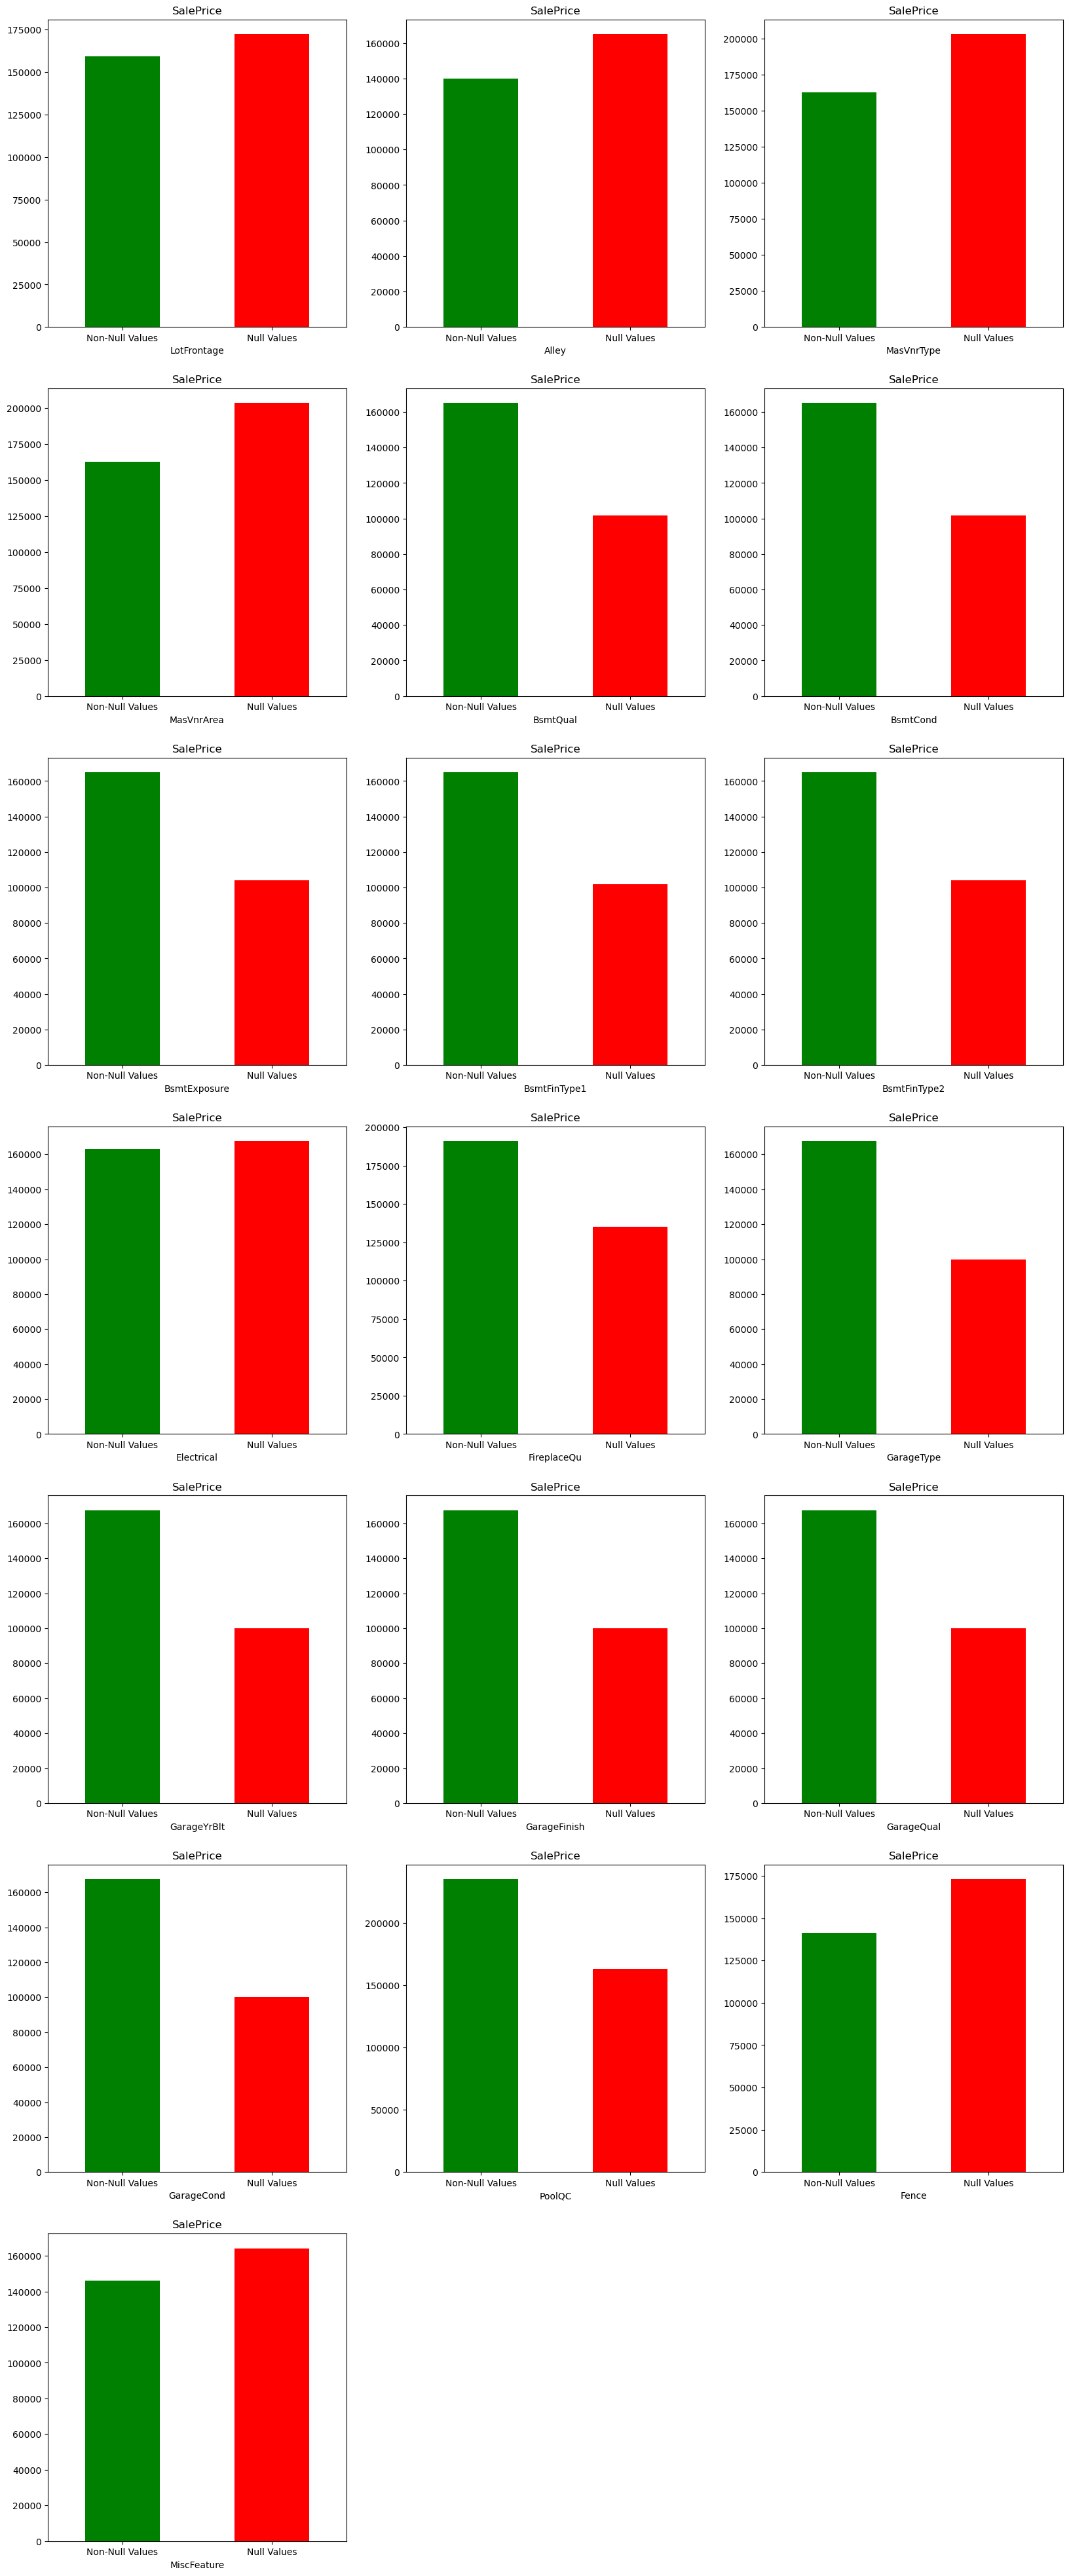

In [8]:
# Check if Nan/Null Values having any impact on the Sale Price or not
nan_columns = []
for j in df1.columns:
    if df1[j].isnull().sum() > 0:
        nan_columns.append(j)
df1_copy = df1.copy()    
fig,axs1= plt.subplots(7,3,figsize=(20,50),squeeze=True)
for j,ax in zip(nan_columns,axs1.flatten()):    
    df1_copy[j] = np.where(df1_copy[j].isnull(), 'Null Values', 'Non-Null Values') 
    df1_copy.groupby(j)['SalePrice'].median().plot.bar(color = list('gr'),rot=0,ax=ax,subplots=True)
axs1[6,1].set_axis_off()    
axs1[6,2].set_axis_off() 
plt.show()

In [9]:
#Observation - The NaN/Null values have impact on the Sale Price. Need to handle these values further in below steps

In [10]:
# Identify the number of numerical and categorical columns
numerical_col = []
categorical_col = []
for i in df1.columns:
    if df1[i].dtypes != 'O':
        numerical_col.append(i)
    else:
        categorical_col.append(i)
print('Total of', len(numerical_col) ,'numerical columns')
print('Total of', len(categorical_col), 'categorical columns')


Total of 38 numerical columns
Total of 43 categorical columns


Text(0.5, 1.0, 'Median House Price Versus YearSold')

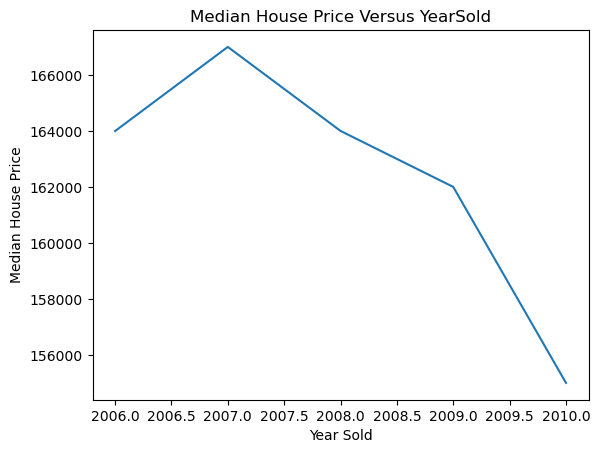

In [11]:
# Identify the median price changes with year sold field
df1['YrSold'] = df1['YrSold'].astype('int')
df1.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("Median House Price Versus YearSold")

In [12]:
#Observation 
##From above graph, median (average) price started to decrease after 2007, the steep decline started from 2007 onwards

In [13]:
# Combine Year Field and check how the price varies vs year of building
year_cols = []
for i in df1.columns:
    if 'Yr' in i or 'Year' in i or 'year' in i or 'yr' in i:
        year_cols.append(i)
print('List of features with Year are:')
print(year_cols)

List of features with Year are:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


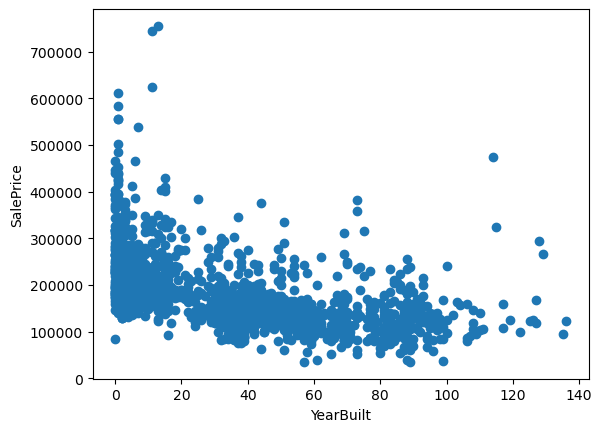

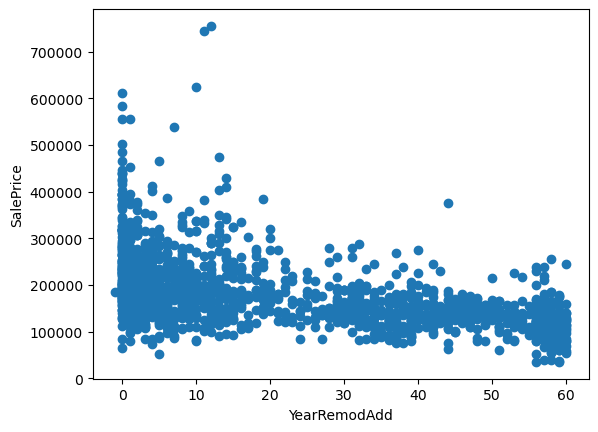

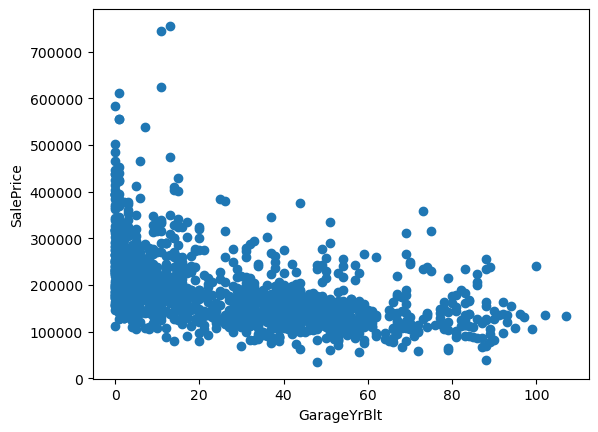

In [14]:
# Using the above year_cols and comparing versus the Sale Price (excluding yearsold - out of scope for this analysis)
for feature in year_cols:
    if feature!='YrSold':
        data1=df1.copy()
        data1[feature]=data1['YrSold']-data1[feature]
        plt.scatter(data1[feature],data1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [15]:
#Observation - Based on above graphs,the new properties are costlier than the old properties in comparison with age of building.

In [16]:
#Step 2 in EDA - Data cleansing & preparation
##Dropping the irrelevant columns (First column ID is not longer useful in our prediction process)
df1.drop('Id', axis=1, inplace=True)

In [17]:
# Creating a new column for the age of the property
df1['age']=df1['YrSold']-df1['YearBuilt']
df1['garage_age'] = df1['YrSold'] - df1['GarageYrBlt']
df1['remodel_age'] = df1['YrSold'] - df1['YearRemodAdd']

df1.drop('GarageYrBlt',axis=1,inplace=True)

In [18]:
# Check the latest info on dataset. 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [19]:
# Translate few fields related to Year into String to make them categorical variable
df1[['MSSubClass']] = df1[['MSSubClass']].astype(str) 
df1['YrSold'] = df1['YrSold'].astype(str)
df1['MoSold'] = df1['MoSold'].astype(str)
df1.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave   NaN      Reg         Lvl   
1         20       RL         80.0     9600   Pave   NaN      Reg         Lvl   
2         60       RL         68.0    11250   Pave   NaN      IR1         Lvl   
3         70       RL         60.0     9550   Pave   NaN      IR1         Lvl   
4         60       RL         84.0    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  \
0          Gd             8        Typ           0         NaN     Attchd   
1          TA             6        Typ           1          TA     Attchd   
2          Gd             6        Typ           1          TA     Attchd

In [20]:
#check the count of Numerical & Categorical field value again
# Identify the number of numerical and categorical columns
numerical_col = []
categorical_col = []
for i in df1.columns:
    if df1[i].dtypes != 'O':
        numerical_col.append(i)
    else:
        categorical_col.append(i)
print('Total of', len(numerical_col) ,'numerical columns')
print('Total of', len(categorical_col), 'categorical columns')

Total of 36 numerical columns
Total of 46 categorical columns


In [21]:
#Observation
##As we have changed the cateogry of three columns , initial value of 43 increased to 46 now.

In [22]:
# Checking list of columns with Missing/Null Values/Nan again
print(round(df1.isnull().sum()/len(df1.index)*100,2).sort_values(ascending=False)[ round(df1.isnull().sum()/len(df1.index),2) > 0 ] )

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
garage_age       5.55
GarageFinish     5.55
GarageType       5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [23]:
#Change based on above listing
df1['PoolQC'] = df1['PoolQC'].fillna('None')
df1['MiscFeature'] = df1['MiscFeature'].fillna('None')
df1['Alley'] = df1['Alley'].fillna('None')
df1['FireplaceQu'] = df1['FireplaceQu'].fillna('None')
df1['LotFrontage'] = df1.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
df1['Fence'] = df1['Fence'].fillna('None')
df1['FireplaceQu'] = df1['FireplaceQu'].fillna('None')
df1['GarageCond'] = df1['GarageCond'].fillna('None')
df1['GarageType'] = df1['GarageType'].fillna('None')
df1['GarageFinish'] = df1['GarageFinish'].fillna('None')
df1['GarageQual'] = df1['GarageQual'].fillna('None')
df1['garage_age'] = df1['GarageQual'].fillna(0)  
df1['BsmtExposure'] = df1['BsmtExposure'].fillna('None')
df1['BsmtFinType2'] = df1['BsmtFinType2'].fillna('None')
df1['BsmtCond'] = df1['BsmtCond'].fillna('None')
df1['BsmtQual'] = df1['BsmtQual'].fillna('None')
df1['BsmtFinType1'] = df1['BsmtFinType1'].fillna('None')
df1['MasVnrType'] = df1['MasVnrType'].fillna('None')
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(0)

In [24]:
# Checking list of columns with Missing/Null Values/Nan again
print(round(df1.isnull().sum()/len(df1.index)*100,2).sort_values(ascending=False)[ round(df1.isnull().sum()/len(df1.index),2) > 0 ] )

Series([], dtype: float64)


In [25]:
#observation
## No field is having null values

In [26]:
round(df1.isnull().sum()/len(df1.index)*100,5).sort_values(ascending=False)

Electrical       0.06849
GarageQual       0.00000
GarageCars       0.00000
GarageFinish     0.00000
GarageType       0.00000
FireplaceQu      0.00000
Fireplaces       0.00000
Functional       0.00000
TotRmsAbvGrd     0.00000
KitchenQual      0.00000
KitchenAbvGr     0.00000
BedroomAbvGr     0.00000
HalfBath         0.00000
FullBath         0.00000
BsmtHalfBath     0.00000
BsmtFullBath     0.00000
GrLivArea        0.00000
LowQualFinSF     0.00000
2ndFlrSF         0.00000
GarageArea       0.00000
GarageCond       0.00000
MSZoning         0.00000
PavedDrive       0.00000
garage_age       0.00000
age              0.00000
SalePrice        0.00000
SaleCondition    0.00000
SaleType         0.00000
YrSold           0.00000
MoSold           0.00000
MiscVal          0.00000
MiscFeature      0.00000
Fence            0.00000
PoolQC           0.00000
PoolArea         0.00000
ScreenPorch      0.00000
3SsnPorch        0.00000
EnclosedPorch    0.00000
OpenPorchSF      0.00000
WoodDeckSF       0.00000


In [27]:
# Filling the Electrical 0.06% rows with the mode
df1['Electrical'] = df1['Electrical'].fillna(df1['Electrical'].mode()[0])
round(df1.isnull().sum()/len(df1.index)*100,5).sort_values(ascending=False)


MSSubClass       0.0
GarageQual       0.0
GarageCars       0.0
GarageFinish     0.0
GarageType       0.0
FireplaceQu      0.0
Fireplaces       0.0
Functional       0.0
TotRmsAbvGrd     0.0
KitchenQual      0.0
KitchenAbvGr     0.0
BedroomAbvGr     0.0
HalfBath         0.0
FullBath         0.0
BsmtHalfBath     0.0
BsmtFullBath     0.0
GrLivArea        0.0
LowQualFinSF     0.0
2ndFlrSF         0.0
GarageArea       0.0
GarageCond       0.0
MSZoning         0.0
PavedDrive       0.0
garage_age       0.0
age              0.0
SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
MiscFeature      0.0
Fence            0.0
PoolQC           0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
1stFlrSF         0.0
Electrical       0.0
CentralAir       0.0
HeatingQC        0.0
YearBuilt        0.0
OverallCond      0.0
OverallQual      0.0
HouseStyle   

In [28]:
#Observation - Missing values are handled 

In [29]:
#Checking for redundant values and try to remove the corresponding colums

print(df1['PoolQC'].value_counts())
print(df1['Utilities'].value_counts())
print(df1['Street'].value_counts())

None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64


In [30]:
#Observation 
##Above columns have same/similar values,so we remove redundant columns.
##These columns didnt have predicting the target variable

In [31]:
# Trying to remove redundant features
def redundant_cols(df1):
    redundant = []
    for i in df1.columns:
        counts = df1[i].value_counts()
        count_max = counts.iloc[0]
        if count_max / len(df1) * 100 > 99:
            redundant.append(i)
    redundant = list(redundant)
    return redundant

In [32]:
redundant_cols = redundant_cols(df1)
redundant_cols

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [33]:
df1.drop(redundant_cols,axis=1,inplace=True)
df1.shape

(1460, 78)

In [34]:
# Identify the fields for Outliers and remove the same
# EDA Analysis shows Living Area, Garage Area, Basement Area and Lot Area. 
#Removing outliers during power transform
def drop_outliers_column(x):
    list = []
    out_columns = ['GrLivArea','GarageArea','TotalBsmtSF','LotArea']
    for col in out_columns:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x  
df1 = drop_outliers_column(df1)
df1.shape

(1455, 78)

In [35]:
#Observation 
##Remove these columns have 99% have same values as we dont have no involvement in the prediction 
## Removed the outliners

In [36]:
#Check the shape of dataframe
df1.shape

(1455, 78)

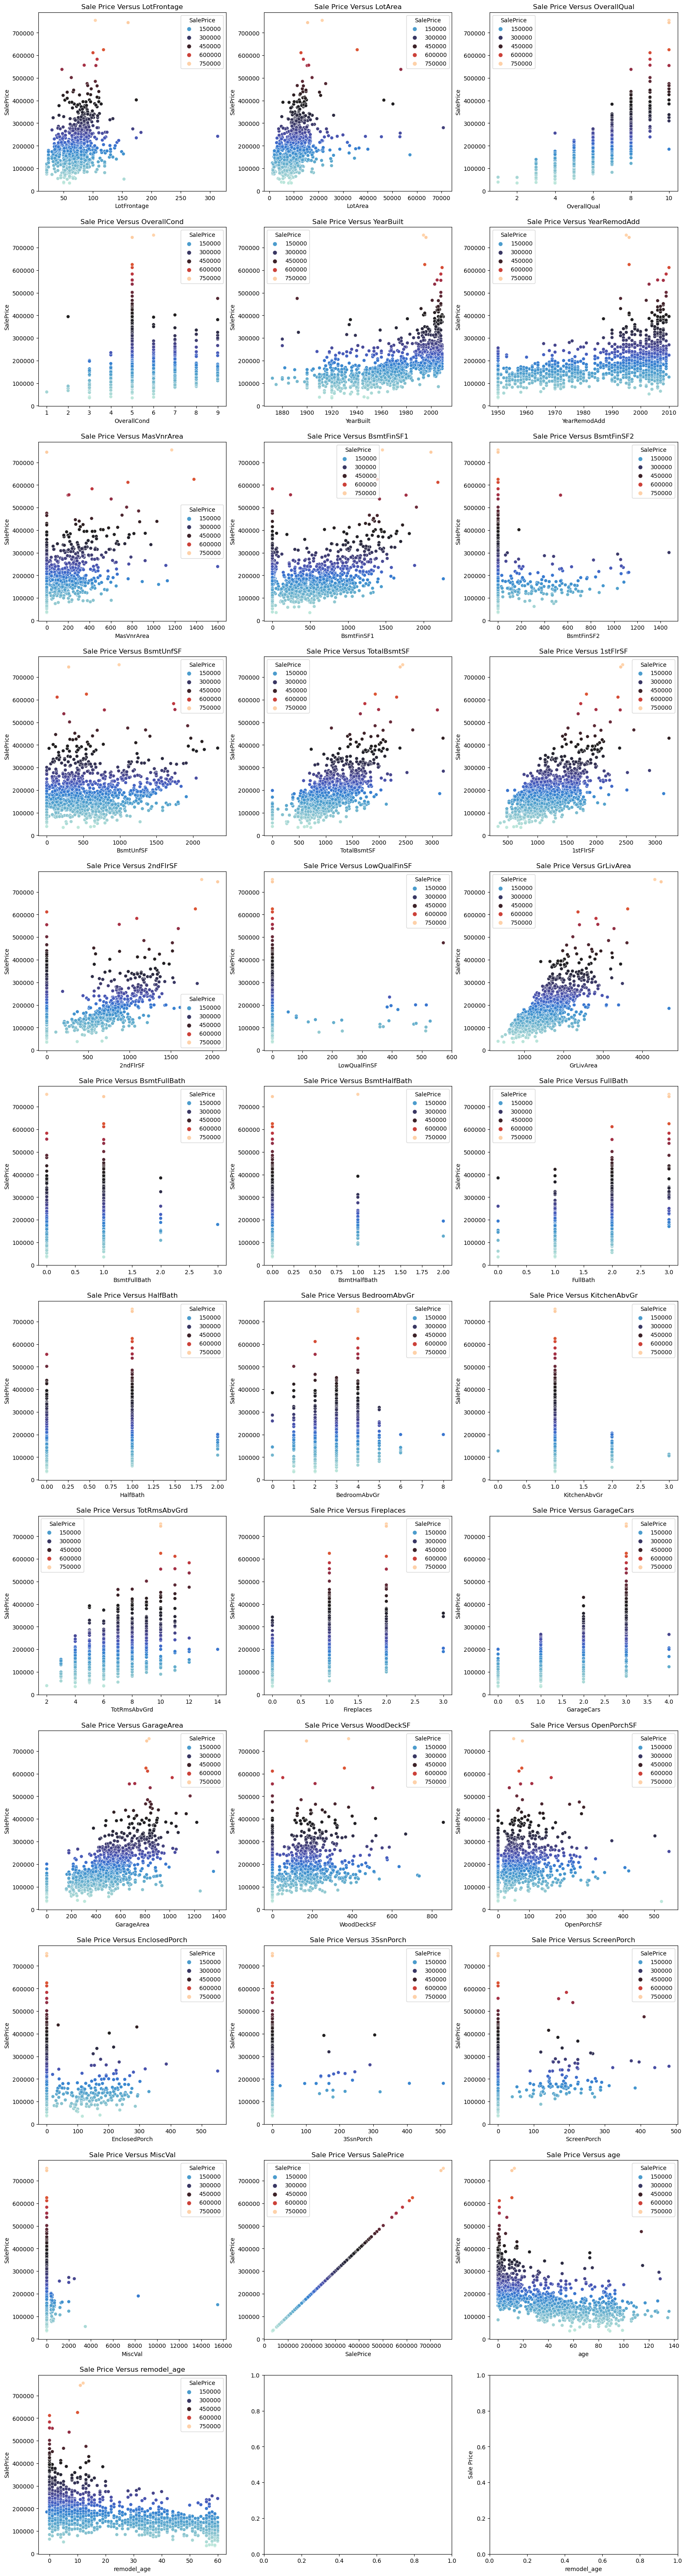

In [37]:
#Step - Data Visualization for Numerical fields Vs Target Variables
df_num1 = df1.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))
for i,ax in zip(df_num1.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice',data=df_num1,ax=ax,palette='icefire')
    plt.xlabel(i,fontsize=10)
    plt.ylabel('Sale Price',fontsize=10)
    ax.set_title('Sale Price'+' Versus '+str(i))

In [38]:
#Observations:
#GRLiving Area has a direct proportional with the price of the property.
#Month sold has no effect on the price.
#New properties are costlier than older properties.
#Total basement area is linearly related with the total living area.
#Also is directly proportional to the price of the property.


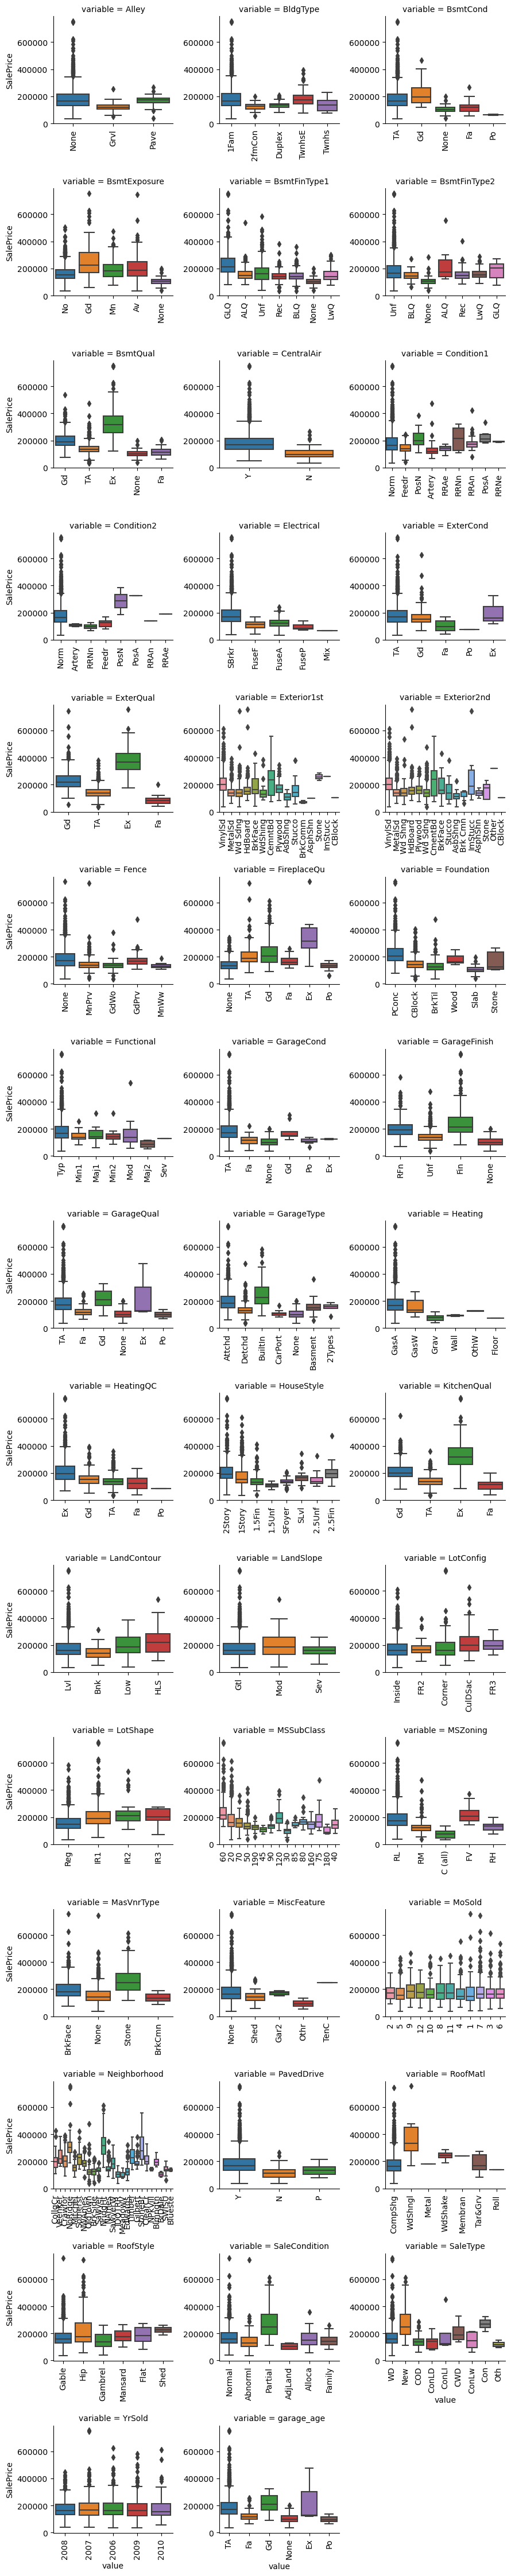

In [39]:
#Step - Data Visualization for Categorial fields Vs Target Variables
def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
categorical_cols = df1.select_dtypes(exclude=['int64','float64'])
f = pd.melt(df1, id_vars=['SalePrice'], value_vars=sorted(df1[categorical_cols.columns]))
g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
g = g.map(facetgrid_boxplot, "value", "SalePrice")

In [40]:
#Observation:
##Houses with good kitchens have positive impact on the price.
##Paved alleys properties are in high price demand.
##Houses with garage conditions were sold at higher prices.
##Houses with good basement quality were sold at higher prices compared to others.

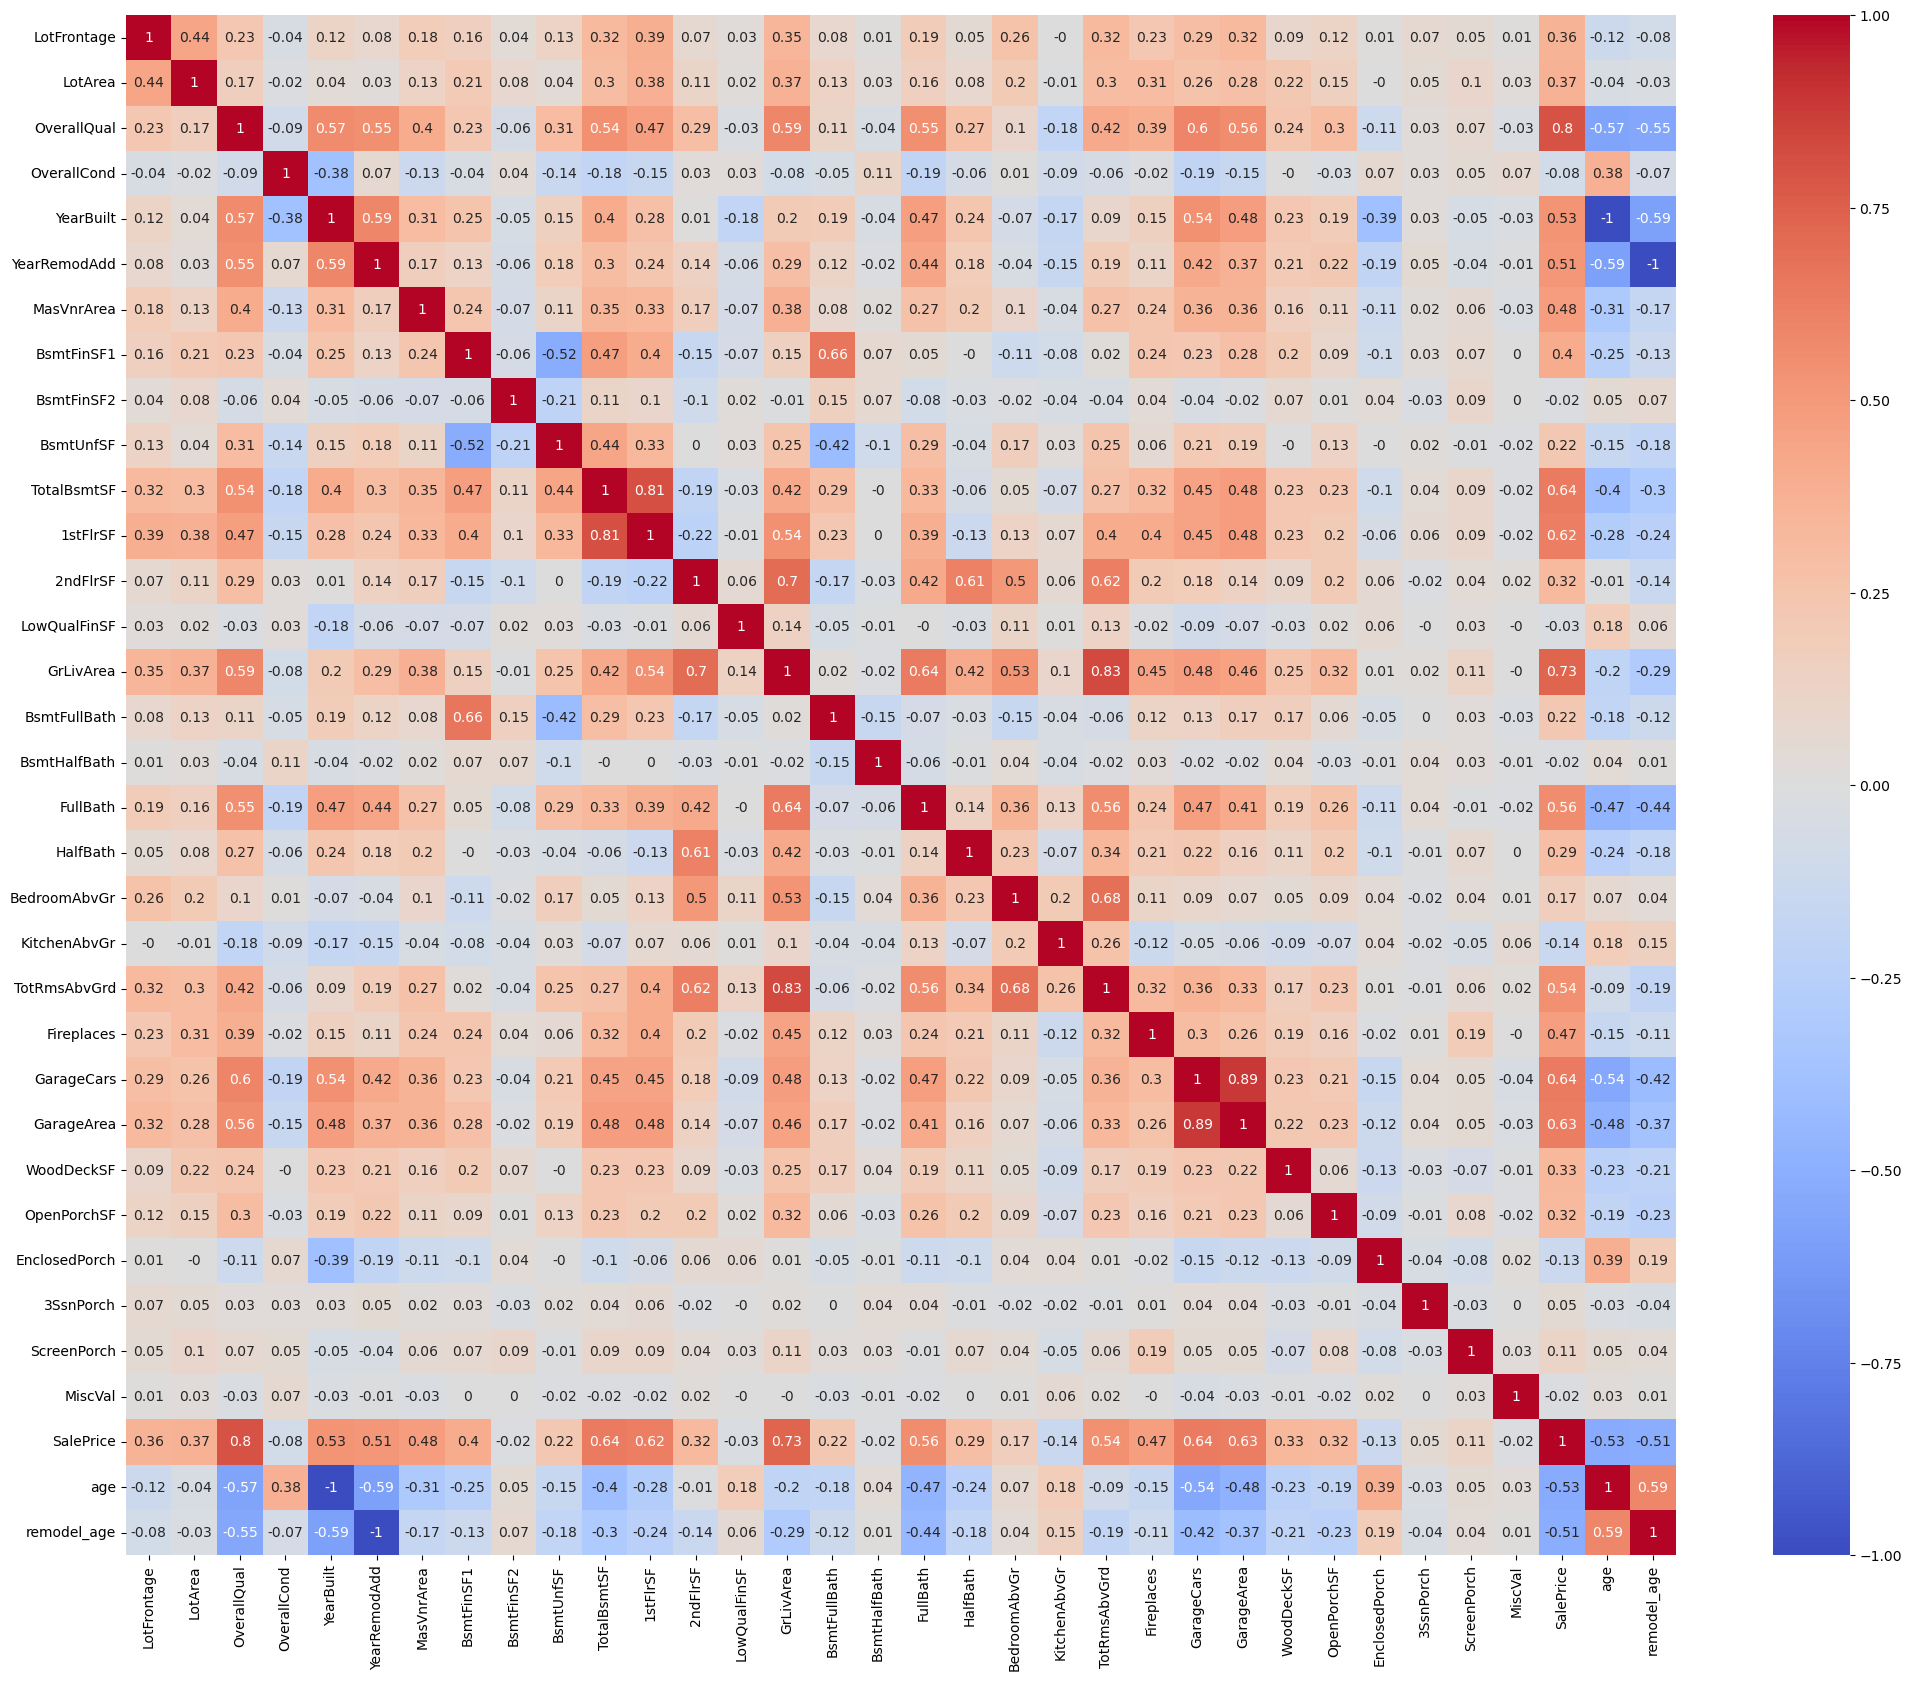

In [41]:
#Correlation Map between umerical fields
plt.subplots(figsize = (25,20))
sns.heatmap(round(df_num1.corr(),2), cmap='coolwarm' , annot=True, center = 0)
plt.show()

In [42]:
#Observation
##Garage Area and Garage Cars are variables are highly correlated fields wrt Saleprice (Target variable)

In [43]:
#Steps - Creation of Derived Columns based on Numerical columns
#Total square foot is important fields in price prediction of house
df1['Total_sqr_footage'] = (df1['BsmtFinSF1'] + df1['BsmtFinSF2'] + df1['1stFlrSF'] + df1['2ndFlrSF'])
#Total porch area should be considered in price prediction
df1['Total_porch_sf'] = (df1['OpenPorchSF'] + df1['3SsnPorch'] + df1['EnclosedPorch'] + df1['ScreenPorch'] + df1['WoodDeckSF'])
# renovated/Remodelled house plays the important role in prediction
df1['YrBltAndRemod']=df1['YearBuilt']+df1['YearRemodAdd']
# Number of bathrooms column is critical role in price prediction
df1['Total_Bathrooms'] = (df1['FullBath'] + (0.5 * df1['HalfBath']) + df1['BsmtFullBath'] + (0.5 * df1['BsmtHalfBath']))

In [44]:
#Steps - Creation of Dummy Variables based on Categorical Columns
num_col1=[]
cat_col1=[]
for i in df1.columns:
    if df1[i].dtypes != 'O':
        num_col1.append(i)
    else:
        cat_col1.append(i)
df1_dummy= pd.get_dummies(df1[cat_col1])   
df1=pd.concat([df1,df1_dummy],axis=1)
df1= df1.drop(cat_col1,axis=1)   

In [45]:
#Count number of rows & cols
df1.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         65.0     8450            7            5       2003          2003   
1         80.0     9600            6            8       1976          1976   
2         68.0    11250            7            5       2001          2002   
3         60.0     9550            7            5       1915          1970   
4         84.0    14260            8            5       2000          2000   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
0       196.0         706           0        150          856       856   
1         0.0         978           0        284         1262      1262   
2       162.0         486           0        434          920       920   
3         0.0         216           0        540          756       961   
4       350.0         655           0        490         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0         1             3             1             8           0           2   
1         0             3             1             6           1           2   
2         1             3             1             6           1           2   
3         0             3             1             7           1           3   
4         1             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   MiscVal  SalePrice  age  remodel_age  Total_sqr_footage  Total_porch_sf  \
0        0     208500    5            5               2416              61   
1        0     181500   31           31               2240             298   
2        0     223500    7            6               2272              42   
3        0     140000   91           36               1933             307   
4        0     250000    8            8               2853             276   

   YrBltAndRemod  Total_Bathrooms  MSSubClass_120  MSSubClass_160  \
0           4006              3.5               0               0   
1           3952              2.5               0               0   
2           4003              3.5               0               0   
3           3885              2.0               0               0   
4           4000              3.5               0               0   

   MSSubClass_180  MSSubClass_190  MSSubClass_20  MSSubClass_30  \
0               0               0              0              0   
1               0               0              1              0   
2               0               0              0              0   
3               0               0              0              0   
4               0               0              0              0   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              1              0   
1              0              0              0              0              0   
2              0              0              0              1              0   
3              0              0  

In [46]:
X = df1.drop('SalePrice',axis=1)
y = df1['SalePrice']



In [47]:
# Checking co-related features
corr = X.corr()
corr1 = corr[abs(corr)>=.6]
#To remove repetition and 1 correlations
corr2 =  corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))  
corr_result = corr2.stack()
print(corr_result[(abs(corr_result) > 0.6)])

OverallQual           GarageCars               0.602025
                      YrBltAndRemod            0.628465
                      ExterQual_TA            -0.647338
YearBuilt             age                     -0.999036
                      YrBltAndRemod            0.931280
                      Foundation_PConc         0.651122
                      BsmtQual_TA             -0.632578
YearRemodAdd          remodel_age             -0.997926
                      YrBltAndRemod            0.845788
MasVnrArea            MasVnrType_None         -0.687465
BsmtFinSF1            BsmtFullBath             0.655652
                      Total_sqr_footage        0.693726
                      BsmtFinType1_Unf        -0.653551
BsmtFinSF2            BsmtFinType2_Unf        -0.715721
BsmtUnfSF             BsmtFinType1_Unf         0.602664
TotalBsmtSF           1stFlrSF                 0.806004
1stFlrSF              Total_sqr_footage        0.640512
2ndFlrSF              GrLivArea                0

In [48]:
#Removing the irrelvant fields from X
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','YrBltAndRemod','Total_Bathrooms','MSSubClass_120','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','Alley_Grvl','Alley_None','LotShape_IR1','LandContour_Bnk','LotConfig_Corner',
        'LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Ex','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','PavedDrive_N','Fence_None','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','MiscFeature_Gar2','Foundation_PConc','garage_age_None'],
         axis=1,inplace=True)

In [49]:
# Check the shape after dropping all correlated columns
X.shape

(1455, 234)

In [73]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

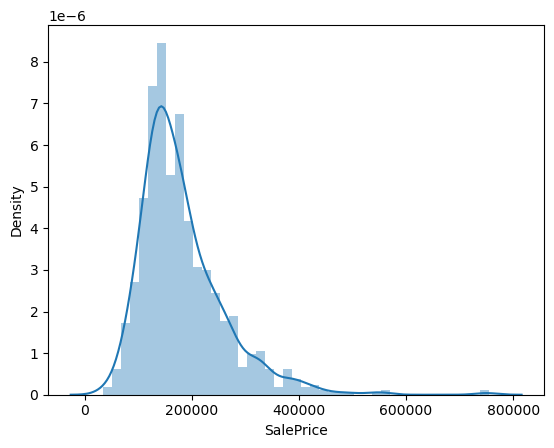

In [74]:
#Distribution of Target Variable
sns.distplot(y_train)
plt.show()

In [75]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())

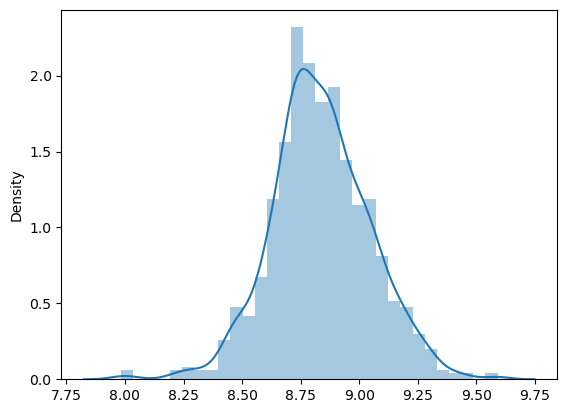

In [76]:
sns.distplot(y_train)
plt.show()

In [77]:
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [78]:
#Check the rows of X_Train
X_train.head()

LotFrontage   LotArea  OverallCond  LowQualFinSF  BsmtFullBath  \
0     0.116438  0.131589     0.428571           0.0      0.000000   
1     0.147260  0.084060     0.428571           0.0      0.000000   
2     0.181507  0.063377     0.714286           0.0      0.333333   
3     0.075342  0.024609     0.428571           0.0      0.000000   
4     0.138699  0.032028     0.428571           0.0      0.000000   

   BsmtHalfBath  TotRmsAbvGrd  GarageArea  OpenPorchSF  EnclosedPorch  \
0           0.0      0.181818    0.143885     0.000000       0.202899   
1           0.0      0.363636    0.483453     0.000000       0.320652   
2           0.0      0.090909    0.221583     0.000000       0.144928   
3           0.0      0.363636    0.309353     0.036563       0.000000   
4           0.0      0.181818    0.331655     0.135283       0.248188   

   3SsnPorch  ScreenPorch  MiscVal       age  remodel_age  Total_sqr_footage  \
0        0.0     0.000000      0.0  0.600000     0.950000           0.044448   
1        0.0     0.000000      0.0  0.044444     0.100000           0.231659   
2        0.0     0.333333      0.0  0.400000     0.166667           0.149372   
3        0.0     0.000000      0.0  0.029630     0.050000           0.173662   
4        0.0     0.000000      0.0  0.155556     0.350000           0.093853   

   Total_porch_sf  MSSubClass_180  MSSubClass_30  MSSubClass_40  \
0        0.109056             0.0            0.0            0.0   
1        0.172347             0.0            0.0            0.0   
2        0.233690             0.0            0.0            0.0   
3        0.158715             0.0            0.0            0.0   
4        0.205453             0.0            0.0            0.0   

   MSSubClass_70  MSZoning_C (all)  MSZoning_RH  MSZoning_RM  Alley_Pave  \
0            0.0               0.0          0.0          0.0         0.0   
1            0.0               0.0          0.0          0.0         0.0   
2            0.0               0.0          0.0          0.0         0.0   
3            0.0               0.0          0.0          0.0         0.0   
4            0.0               0.0          0.0          0.0         0.0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0           0.0           0.0           1.0              0.0              0.0   
1           0.0           0.0           1.0              0.0              0.0   
2           0.0           0.0           1.0              0.0              0.0   
3           0.0           0.0           1.0              0.0              0.0   
4           0.0           0.0           1.0              0.0              0.0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0              1.0                0.0            0.0            0.0   
1              1.0                0.0            0.0            0.0   
2              1.0                0.0            0.0            0.0   
3              1.0                0.0            0.0            0.0   
4              1.0                0.0            0.0            0.0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  \
0               1.0            0.0            0.0                   0.0   
1               0.0            0.0            0.0                   0.0   
2               1.0            0.0            0.0                   0.0   
3               1.0            0.0            0.0                   1.0   
4               1.0            0.0            0.0                   0.0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   
3                   0.0                  0.0                   0.0   
4                   0.0                  0.0                   0.0   

   Neighborhood_ClearC

In [54]:
#In a linear regression model, the target is modeled as a linear combination (or weighted sum) of input features. 
#Instead, we'll use Ridge Regression, a variant of linear regression that uses a technique called L2 regularization 
#to introduce another loss term that forces the model to regularize better.

Fitting 11 folds for each of 28 candidates, totalling 308 fits


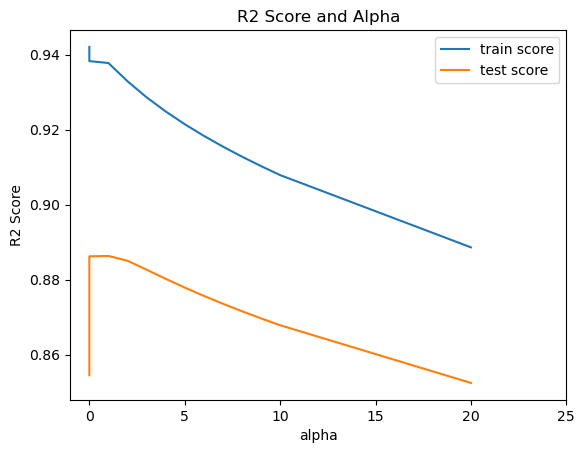

The optimum alpha is 1
The R2 Score of the model on the test dataset for optimum alpha is 0.8640227314144573
The MSE of the model on the test dataset for optimum alpha is 0.005586100361598633


In [80]:
# list of alphas values 
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()

# Using RFE to find top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train,y_train)
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe,y_train)
ridge_coef = ridge_final.coef_
y_test_pred = ridge_final.predict(X_test_rfe)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))



In [81]:
# VIF - RFE elimination
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
high_vif = vif[vif['VIF']>10]
high_vif

Features     VIF
233         garage_age_TA     inf
180        FireplaceQu_TA     inf
200              MoSold_1     inf
105   Exterior1st_Plywood     inf
104   Exterior1st_MetalSd     inf
102   Exterior1st_HdBoard     inf
101   Exterior1st_CemntBd     inf
100    Exterior1st_CBlock     inf
99    Exterior1st_BrkFace     inf
98    Exterior1st_BrkComm     inf
97    Exterior1st_AsphShn     inf
96    Exterior1st_AsbShng     inf
146      BsmtFinType2_GLQ     inf
147      BsmtFinType2_LwQ     inf
148     BsmtFinType2_None     inf
149      BsmtFinType2_Rec     inf
150      BsmtFinType2_Unf     inf
168       Functional_Maj1     inf
169       Functional_Maj2     inf
170       Functional_Min1     inf
171       Functional_Min2     inf
172        Functional_Mod     inf
173        Functional_Sev     inf
174        Functional_Typ     inf
175        FireplaceQu_Ex     inf
176        FireplaceQu_Fa     inf
177        FireplaceQu_Gd     inf
178      FireplaceQu_None     inf
188      GarageFinish_Unf     inf
179        FireplaceQu_Po     inf
187      GarageFinish_RFn     inf
201             MoSold_10     inf
202             MoSold_11     inf
203             MoSold_12     inf
110   Exterior1st_WdShing     inf
232         garage_age_Po     inf
231         garage_age_Gd     inf
230         garage_age_Fa     inf
216           YrSold_2010     inf
215           YrSold_2009     inf
214           YrSold_2008     inf
144      BsmtFinType2_ALQ     inf
145      BsmtFinType2_BLQ     inf
106     Exterior1st_Stone     inf
212           YrSold_2006     inf
213           YrSold_2007     inf
109   Exterior1st_Wd Sdng     inf
209              MoSold_7     inf
204              MoSold_2     inf
205              MoSold_3     inf
206              MoSold_4     inf
108   Exterior1st_VinylSd     inf
208              MoSold_6     inf
207              MoSold_5     inf
107    Exterior1st_Stucco     inf
210              MoSold_8     inf
211              MoSold_9     inf
186      GarageFinish_Fin     inf
143      BsmtFinType1_Unf  492.75
140      BsmtFinType1_GLQ  488.90
138      BsmtFinType1_ALQ  292.03
137       BsmtExposure_No  240.30
139      BsmtFinType1_BLQ  206.97
142      BsmtFinType1_Rec  162.57
134       BsmtExposure_Av  143.45
141      BsmtFinType1_LwQ  111.74
135       BsmtExposure_Gd   85.97
136       BsmtExposure_Mn   83.79
49     Neighborhood_NAmes   76.36
42   Neighborhood_CollgCr   60.13
53   Neighborhood_OldTown   49.35
44   Neighborhood_Edwards   45.77
57   Neighborhood_Somerst   41.88
52   Neighborhood_NridgHt   31.53
55    Neighborhood_Sawyer   30.57
40   Neighborhood_BrkSide   29.58
50    Neighborhood_NWAmes   29.30
45   Neighborhood_Gilbert   28.72
43   Neighborhood_Crawfor   28.04
56   Neighborhood_SawyerW   24.73
48   Neighborhood_Mitchel   23.85
51   Neighborhood_NoRidge   18.69
13                    age   18.14
46    Neighborhood_IDOTRR   17.05
59    Neighborhood_Timber   16.41
58   Neighborhood_StoneBr   14.54
41   Neighborhood_ClearCr   12.38
54     Neighborhood_SWISU   11.68

In [82]:
# Drop columns with high VIF
X_train_rfe2 = X_train_rfe.drop(high_vif.Features,axis=1)
X_test_rfe2 = X_test_rfe.drop(high_vif.Features,axis=1)


In [58]:
#Observation 
#All the columns did not suffer from multicollinearity 

Fitting 11 folds for each of 28 candidates, totalling 308 fits


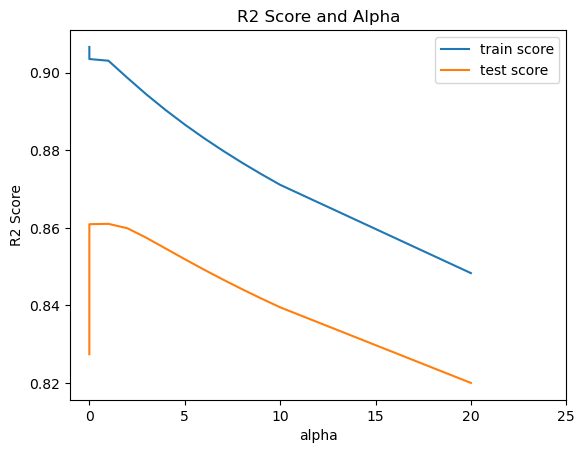

The optimum alpha is 1
The R2 Score of the model on the test dataset for optimum alpha is 0.8359129730116989
The MSE of the model on the test dataset for optimum alpha is 0.006740881107023855


In [83]:
# Building Ridge Model again
# Building the second Ridge Model
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=30]
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.xticks(np.arange(0,30,5))
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
ridge_final2 = Ridge(alpha=alpha,random_state=100)
ridge_final2.fit(X_train_rfe2,y_train)
ridge_coef2 = ridge_final2.coef_
y_test_pred = ridge_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))


In [84]:
#Co-efficients of the model
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2),columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Co-Efficient'},inplace=True)
ridge_coeff2.sort_values(by=['Ridge Co-Efficient'], ascending=False,inplace=True)
ridge_coeff2.head(20)


Ridge Co-Efficient
Total_sqr_footage               0.459042
GarageArea                      0.215074
TotRmsAbvGrd                    0.155003
LotArea                         0.125733
OverallCond                     0.101723
SaleType_CWD                    0.098161
LotFrontage                     0.088044
HouseStyle_2.5Unf               0.075202
Total_porch_sf                  0.072676
RoofMatl_WdShngl                0.072215
CentralAir_Y                    0.069394
SaleType_Con                    0.062119
LandContour_HLS                 0.060496
Condition2_Norm                 0.052773
Condition2_PosA                 0.051670
KitchenQual_Ex                  0.049366
HouseStyle_1.5Unf               0.040599
MSSubClass_70                   0.038129
BsmtQual_Ex                     0.036923
Neighborhood_Veenker            0.036281

In [61]:
#Observation 
#Top 20 features which are impacting the price of the property are listed above.

In [85]:
#Lasso Method
#Trying Lasso Model to check it's overall perfromance of the model
# Creating a model with an arbitrary alpha to understand the value ranges
lasso1 = Lasso(alpha=0.0001)        
lasso1.fit(X_train_rfe2, y_train) 

y_test_pred = lasso1.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for 0.0001 alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))


The R2 Score of the model on the test dataset for 0.0001 alpha is 0.832142306994059
The MSE of the model on the test dataset for optimum alpha is 0.006895784342128587


Fitting 11 folds for each of 11 candidates, totalling 121 fits


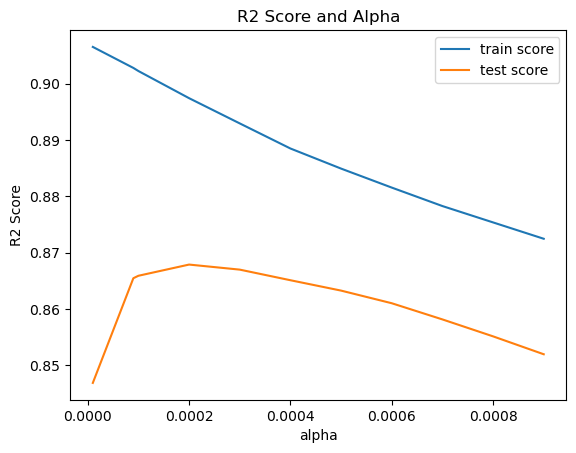

The optimum alpha is 0.0002
The R2 Score of the model on the test dataset for optimum alpha is 0.836130271750978
The MSE of the model on the test dataset for optimum alpha is 0.006731954228445631


In [86]:
# Building Lasso Model with GridSearch CV to find optimum alpha
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009 ]}
lasso = Lasso(random_state=100)

# cross validation
folds = 11
model_cv = GridSearchCV(estimator = lasso, param_grid = params, scoring= 'r2', cv = folds, return_train_score=True, verbose = 1)            
model_cv.fit(X_train_rfe2, y_train) 

cv_results = pd.DataFrame(model_cv.cv_results_)
# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is',alpha)
lasso_final2 = Lasso(alpha=alpha,random_state=100)
lasso_final2.fit(X_train_rfe2,y_train)
lasso_coef2 = lasso_final2.coef_
y_test_pred = lasso_final2.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for optimum alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))


In [87]:
#Displaing the co-efficients of the model
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2),columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Co-Efficient"},inplace=True)
lasso_coeff2.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
lasso_coeff2.head(20)


Lasso Co-Efficient
Total_sqr_footage                0.543854
GarageArea                       0.217039
TotRmsAbvGrd                     0.137567
LotArea                          0.111823
OverallCond                      0.096323
CentralAir_Y                     0.072815
Total_porch_sf                   0.071217
HouseStyle_2.5Unf                0.056901
SaleType_CWD                     0.051616
LandContour_HLS                  0.047457
KitchenQual_Ex                   0.044304
LotFrontage                      0.040095
BsmtQual_Ex                      0.037305
SaleCondition_Partial            0.034629
MSSubClass_70                    0.034425
PavedDrive_Y                     0.027893
Condition1_Norm                  0.026634
RoofMatl_WdShngl                 0.025823
Alley_Pave                       0.025242
OpenPorchSF                      0.024802

In [88]:
ridge_final2

Ridge(alpha=1, random_state=100)

In [89]:
lasso_final2

Lasso(alpha=0.0002, random_state=100)

In [65]:
#Observation 
# Ridge & Lasso regression model both have same R2 score = 0.83 and MSE = 0.0068
#Optimal value for ridge = 1 and for lasso = 0.0002.
#Below are Signifant variables which have cruical role in predicting the Sale price of the house
#Total area in square foot
#Total Garage Area
#Total Rooms
#Overall Condition
#Lot Area
#Centrally Air Conditioned
#Total Porch Area (Open + closed)
#Neighborhood Areas (Stone Brook /Veenker)
#Paved Alley

In [66]:
# Problem II - Subjective Questions & Identifying the answers for the same
##1.What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model
#if you choose double the value of alpha for both ridge and lasso? 
#What will be the most important predictor variables after the change is implemented?
#Answer
#The Optimal value of alpha for ridge = 1 and for lasso = 0.0002.

In [90]:
# Building Ridge Model by doubling the value of alpha to 2 (initial value = 1)
ridge_double = Ridge(alpha=2,random_state=100)
ridge_double.fit(X_train_rfe2,y_train)
ridge_double_coef = ridge_double.coef_
y_test_pred = ridge_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe2.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge Doubled Alpha Co-Efficient'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
ridge_double_coeff.head(20)


The R2 Score of the model on the test dataset for doubled alpha is 0.8398968419006967
The MSE of the model on the test dataset for doubled alpha is 0.006577219256238907
The most important predictor variables are as follows:


Ridge Doubled Alpha Co-Efficient
Total_sqr_footage                             0.405689
GarageArea                                    0.204762
TotRmsAbvGrd                                  0.164504
LotArea                                       0.113824
OverallCond                                   0.096920
SaleType_CWD                                  0.080306
LotFrontage                                   0.078705
Total_porch_sf                                0.073541
CentralAir_Y                                  0.072929
HouseStyle_2.5Unf                             0.071178
RoofMatl_WdShngl                              0.065830
LandContour_HLS                               0.055128
KitchenQual_Ex                                0.051273
SaleType_Con                                  0.042650
BsmtQual_Ex                                   0.039141
Condition2_Norm                               0.038724
MSSubClass_70                                 0.037222
PavedDrive_Y                                  0.036091
Neighborhood_Veenker                          0.034917
Condition2_PosA                               0.033983

In [91]:
# Building Lasso Model by doubling the value of alpha to 0.0004 (initial value = 0.002)
lasso_double = Lasso(alpha=0.0004,random_state=100)
lasso_double.fit(X_train_rfe2,y_train)
lasso_double_coef = lasso_double.coef_
y_test_pred = lasso_double.predict(X_test_rfe2)
print('The R2 Score of the model on the test dataset for doubled alpha is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for doubled alpha is', mean_squared_error(y_test, y_test_pred))
lasso_double_coeff = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe2.columns)
lasso_double_coeff = lasso_double_coeff.T
lasso_double_coeff.rename(columns={0: 'Lasso Doubled Alpha Co-Efficient'},inplace=True)
lasso_double_coeff.sort_values(by=['Lasso Doubled Alpha Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso_double_coeff.head(20)


The R2 Score of the model on the test dataset for doubled alpha is 0.8366014113903051
The MSE of the model on the test dataset for doubled alpha is 0.006712599277894078
The most important predictor variables are as follows:


Lasso Doubled Alpha Co-Efficient
Total_sqr_footage                              0.537830
GarageArea                                     0.208540
TotRmsAbvGrd                                   0.149942
OverallCond                                    0.085500
CentralAir_Y                                   0.075181
Total_porch_sf                                 0.069284
LotArea                                        0.064586
KitchenQual_Ex                                 0.045076
BsmtQual_Ex                                    0.039116
SaleCondition_Partial                          0.034450
LandContour_HLS                                0.031449
HouseStyle_2.5Unf                              0.030696
MSSubClass_70                                  0.029321
PavedDrive_Y                                   0.025527
ExterQual_Ex                                   0.024025
Condition1_Norm                                0.023043
BsmtCond_TA                                    0.021770
OpenPorchSF                                    0.019072
Alley_Pave                                     0.017456
MasVnrType_Stone                               0.015927

In [69]:
#Observation :
##Since the alpha value was quite small, doubling it does not have significant change in both the models and the R2 and MSE remains same.
##The most important predictor variables also remain the same.
##but the Central Air Conditioned - Yes attribute gains higher importance than Lot Area in the Lasso Model.

In [95]:
##Question 3.After building the model, you realised that the five most important predictor variables in the lasso model 
##are not available in the incoming data.
##You will now have to create another model excluding the five most important predictor variables.
##Which are the five most important predictor variables now?
X_test_rfe3 = X_test_rfe2.drop(['Total_sqr_footage','GarageArea','TotRmsAbvGrd','OverallCond','CentralAir_Y'],axis=1)
X_train_rfe3 = X_train_rfe2.drop(['Total_sqr_footage','GarageArea','TotRmsAbvGrd','OverallCond','CentralAir_Y'],axis=1)


In [96]:
# Building Lasso Model with the new dataset
lasso3 = Lasso(alpha=0.0002,random_state=100)
lasso3.fit(X_train_rfe3,y_train)
lasso3_coef = lasso3.coef_
y_test_pred = lasso3.predict(X_test_rfe3)
print('The R2 Score of the model on the test dataset is',r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset is', mean_squared_error(y_test, y_test_pred))
lasso3_coeff = pd.DataFrame(np.atleast_2d(lasso3_coef),columns=X_train_rfe3.columns)
lasso3_coeff = lasso3_coeff.T
lasso3_coeff.rename(columns={0: 'Lasso Co-Efficient'},inplace=True)
lasso3_coeff.sort_values(by=['Lasso Co-Efficient'], ascending=False,inplace=True)
print('The most important predictor variables are as follows:')
lasso3_coeff.head(5)


The R2 Score of the model on the test dataset is 0.716488839032928
The MSE of the model on the test dataset is 0.01164695993138806
The most important predictor variables are as follows:


Lasso Co-Efficient
LotArea                      0.305439
LotFrontage                  0.253582
Total_porch_sf               0.143257
BsmtFullBath                 0.104663
HouseStyle_2.5Unf            0.102524